## 数据集waimai-10k
## kaggle链接：https://www.kaggle.com/code/czy111/nlp1-character-level-rnn-text-classification/edit

In [1]:
## 读取数据
import pandas as pd
df=pd.read_csv('/kaggle/input/waimai-10k/waimai_10k.csv')
df.head()


,label,review
0,1,很快，好吃，味道足，量大
1,1,没有送水没有送水没有送水
2,1,非常快，态度好。
3,1,方便，快捷，味道可口，快递给力
4,1,菜味道很棒！送餐很及时！


In [69]:
labels.count(0)

7987

In [51]:
labels=list(df['label'].values)
txt_list=list(df['review'].values)
labels[:10],txt_list[:10]

([1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 ['很快，好吃，味道足，量大',
  '没有送水没有送水没有送水',
  '非常快，态度好。',
  '方便，快捷，味道可口，快递给力',
  '菜味道很棒！送餐很及时！',
  '今天师傅是不是手抖了，微辣格外辣！',
  '送餐快,态度也特别好,辛苦啦谢谢',
  '超级快就送到了，这么冷的天气骑士们辛苦了。谢谢你们。麻辣香锅依然很好吃。',
  '经过上次晚了2小时，这次超级快，20分钟就送到了……',
  '最后五分钟订的，卖家特别好接单了，谢谢。'])

In [52]:
#创建字符表
char_set=set()
for txt in txt_list:
    for char in txt:
        char_set.add(char)
char_list=list(char_set)
n_chars=len(char_list)+1
print('词表大小：',n_chars)
len(char_list[:5])

词表大小： 2559


5

In [91]:
import torch
def text_to_tensor(text):#
    tensor=torch.zeros(len(text),dtype=torch.long)
    for i,char in enumerate(text):
        try:
            ind=char_list.index(char)
        except:
            ind=n_chars-1
        tensor[i]=ind
    return tensor

def tensor_to_text(input_tensor):
    s=""
    input_tensor=input_tensor.squeeze(0)
    for i in range(input_tensor.shape[0]):
        s+=char_list[input_tensor[i].item()]
    return s
embed=torch.nn.Embedding(n_chars,100)
test=txt_list[1]
print(test)
print(text_to_tensor(test))
print(embed(text_to_tensor(test)).shape)
print(tensor_to_text(text_to_tensor(test)))

没有送水没有送水没有送水
tensor([1221, 1328, 1030, 1703, 1221, 1328, 1030, 1703, 1221, 1328, 1030, 1703])
torch.Size([12, 100])
没有送水没有送水没有送水


In [122]:
## 将数据都处理成tensor
all_data=[]
classes=['bad','good']

for txt,label in zip(list(txt_list),list(labels)):
    txt=title_to_tensor(txt)
    label=torch.tensor(label,dtype=torch.long)
    all_data.append((txt,label))
all_data[:5]

[(tensor([1636, 1695, 2521, 1781,  116, 2521, 1728,  252, 1415, 2521,  904, 1069]),
  tensor(1)),
 (tensor([1221, 1328, 1030, 1703, 1221, 1328, 1030, 1703, 1221, 1328, 1030, 1703]),
  tensor(1)),
 (tensor([ 364, 2181, 1695, 2521,  946,  506, 1781, 2555]), tensor(1)),
 (tensor([2065, 2201, 2521, 1695, 2050, 2521, 1728,  252, 1994,  347, 2521, 1695,
           601, 1568, 1770]),
  tensor(1)),
 (tensor([2485, 1728,  252, 1636, 2148, 1453, 1030, 1370, 1636,  982, 1912, 1453]),
  tensor(1))]

In [71]:
## 打乱、划分数据集
import random
random.shuffle(all_data)
data_len=len(all_data)

split_ratio=0.7
train_len=int(data_len*split_ratio)
train_data=all_data[:train_len]
test_data=all_data[train_len:]

print(len(test_data))

3597


In [12]:
## 手写单隐藏层RNN
from torch import nn
class RNN(nn.Module):
    def __init__(self,word_count,embedding_size,hidden_size,output_size):
        super().__init__()
        self.hidden_size=hidden_size
        self.embedding=nn.Embedding(word_count,embedding_size)
        self.i2h=nn.Linear(embedding_size+hidden_size,hidden_size)#RNN权重共享
        self.i2o=nn.Linear(embedding_size+hidden_size,output_size)
        self.softmax=nn.LogSoftmax(dim=1)
    def forward(self,x,hidden):
        word_vector=self.embedding(x)
        combined=torch.cat([word_vector,hidden],dim=1)
        hidden=self.i2h(combined)
        output=self.i2o(combined)
        output=self.softmax(output)
        return output,hidden
    def init_hidden(self):
        return torch.zeros(1,self.hidden_size)
    

        

In [104]:
## 测试RNN
embedding_size=200
n_hidden=128
n_class=2
rnn=RNN(n_chars,embedding_size,n_hidden,n_class)

input_tensor=all_data[1][0]
hidden=rnn.init_hidden()
output,hidden=rnn(input_tensor[0].unsqueeze(dim=0),hidden)
print(output,hidden)

tensor([[-0.4472, -1.0201]], grad_fn=<LogSoftmaxBackward0>) tensor([[-0.0966, -0.4665, -0.1183, -0.2810, -0.0077, -0.0342, -0.2119, -0.2632,
         -0.2926, -0.3624, -0.3419, -0.2175, -0.3822, -0.3430, -0.4258,  0.6271,
          0.3097, -0.4572, -0.1795, -0.1811, -0.2192,  0.4578, -0.1724, -0.0348,
         -0.0996,  0.5215,  0.3241,  0.3290, -0.0712, -0.3839, -0.7732, -0.0767,
         -0.3132, -0.1043,  0.0381, -0.3052, -0.2384,  0.1297,  0.0683,  0.2184,
         -0.3277, -0.6654, -0.4540, -0.2388,  0.9076, -0.3745, -0.0408,  0.1036,
          0.2587,  0.3505,  0.4563,  0.5832,  0.7226,  0.1858, -0.1493,  0.0657,
         -0.0054,  0.5907,  0.4838,  0.1476, -0.7828, -0.4390, -0.4592, -0.3781,
         -0.0086,  0.0231,  0.3816, -0.1291, -0.4141, -0.2241, -0.0567, -0.2987,
          0.0938, -0.3319,  0.5381, -0.6686, -0.0415, -0.5490,  0.4115, -0.5267,
         -0.3482, -1.0784,  0.1560, -0.0458, -0.4346, -0.4767, -0.0555, -0.1364,
         -0.2629, -0.4657, -0.8517, -0.2134,  0.4

In [64]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## 得到rnn最后一层output
def run_rnn(rnn,input_tensor,device=device):
    hidden=rnn.init_hidden().to(device)
    for i in range(input_tensor.size()[0]):
        output,hidden=rnn(input_tensor[i].unsqueeze(dim=0),hidden)
    return output
run_rnn(rnn,input_tensor,device=input_tensor.device)

In [147]:
## 梯度裁剪
## 控制参数的L2范数不大于theta
## 训练速度会变慢
def grad_clipping(net,theta):
    params=[p for p in net.parameters() if p.requires_grad]
    norm=torch.sqrt(sum(torch.sum((p.grad**2)) for p in params))#所有参数梯度组成的向量的L2范数
    if norm>theta:
        for param in params:
            param.grad[:]*=theta/norm

In [148]:
## 训练和评估
def train(rnn,criterion,input_tensor,label_tensor,device=device):
    rnn.zero_grad()
    output=run_rnn(rnn,input_tensor)
    loss=criterion(output,label_tensor)
    
    loss.backward()
    grad_clipping(rnn, 1)
    for p in rnn.parameters():
        p.data.add_(p.grad.data,alpha=-lr)
    return output,loss.item()

def evaluate(rnn,input_tensor,device=device):
    with torch.no_grad():
        hidden=rnn.init_hidden().to(device)
        output=run_rnn(rnn,input_tensor)
        return output


In [159]:
from tqdm import tqdm
import matplotlib.pyplot as plt
def train_k_epochs(net,epochs,lr,criterion,device,plot_loss=True):
    loss_sum=0
    all_losses=[]
    plot_every=100

    for epoch in range(epochs):
        random.shuffle(train_data)
        for i,(input_tensor,label_tensor) in enumerate(tqdm(train_data)):
            if i>5000:
                break
            input_tensor=input_tensor.to(device)
            label_tensor=label_tensor.to(device)
            output,loss=train(net,criterion,input_tensor,label_tensor.unsqueeze(0))
            loss_sum+=loss
            if i %plot_every==0:
                all_losses.append(loss_sum/plot_every)
                loss_sum=0
        c=0
        random.shuffle(test_data)
        for i,(text,label) in enumerate(tqdm(test_data)):
            if i>500:
                break
            text=text.to(device)
            output=evaluate(net,text)
            predict=torch.argmax(output)
            if predict==label.item():
                c+=1
        print('acc:',c/500)
        print(evaluate(rnn,input_tensor.cuda()))#检查是否有梯度爆炸
    if plot_loss:
        ## 损失变化图像
        plt.figure(figsize=(6,6))
        plt.ylabel('Average Loss')
        plt.plot(all_losses[1:])
        plt.show()




 14%|█▍        | 501/3597 [00:01<00:10, 291.02it/s]


acc: 0.642
tensor([[-0.0167, -4.1025]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:11, 279.17it/s]


acc: 0.664
tensor([[-0.4379, -1.0368]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:11, 273.26it/s]


acc: 0.688
tensor([[-1.1259, -0.3921]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:11, 270.59it/s]


acc: 0.72
tensor([[-1.6184, -0.2209]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:10, 293.12it/s]


acc: 0.738
tensor([[-0.5667, -0.8379]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:11, 280.32it/s]


acc: 0.686
tensor([[-0.0316, -3.4711]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:11, 274.91it/s]


acc: 0.744
tensor([[-4.7684e-04, -7.6486e+00]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:10, 285.58it/s]


acc: 0.746
tensor([[-0.0071, -4.9534]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:12, 253.06it/s]


acc: 0.792
tensor([[-0.1018, -2.3348]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:11, 277.06it/s]


acc: 0.83
tensor([[-5.6942e-04, -7.4712e+00]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:10, 301.39it/s]


acc: 0.85
tensor([[-1.0847e-04, -9.1288e+00]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:10, 300.99it/s]


acc: 0.812
tensor([[-3.9629e-04, -7.8337e+00]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:10, 297.76it/s]


acc: 0.848
tensor([[-1.5353e-04, -8.7820e+00]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:11, 266.26it/s]


acc: 0.854
tensor([[-1.3208e-04, -8.9323e+00]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:10, 290.46it/s]


acc: 0.848
tensor([[-0.1477, -1.9852]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:10, 289.92it/s]


acc: 0.838
tensor([[-0.0109, -4.5266]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:11, 279.52it/s]


acc: 0.862
tensor([[-0.0100, -4.6096]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:10, 282.54it/s]


acc: 0.83
tensor([[-1.8866e-03, -6.2739e+00]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:11, 274.47it/s]


acc: 0.856
tensor([[-8.2852e+00, -2.5222e-04]], device='cuda:0')


 14%|█▍        | 501/3597 [00:01<00:11, 265.34it/s]


acc: 0.86
tensor([[-1.7432e-03, -6.3529e+00]], device='cuda:0')


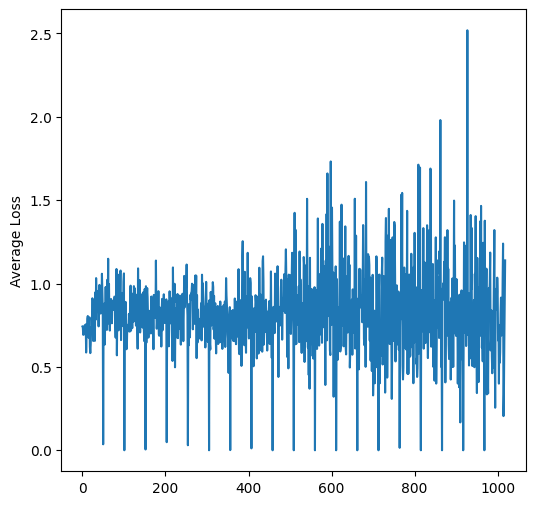

In [160]:
## 训练
## 训练次数过多会梯度爆炸

mode='build'#load:加载已经训过的模型;build:重新训练
epochs =20
lr=0.001
embedding_size=200
n_hidden=128
n_class=2
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
rnn=RNN(n_chars,embedding_size,n_hidden,n_class).to(device)
criterion=nn.NLLLoss()## result,target,


if mode=='load':
    rnn.load_state_dict(torch.load('rnn_parameter.pkl'))

train_k_epochs(rnn,epochs,lr,criterion,device)

In [161]:
## 在完整测试集上计算测试结果
bad_list=[]
good_list=[]
c=0
for i,(text,label) in enumerate(tqdm(test_data)):
    text=text.to(device)
    output=evaluate(rnn,text)
    predict=torch.argmax(output)
    #print(output)
    if predict==label.item():
        c+=1
    if predict==0:
        bad_list.append(tensor_to_text(text))
    else :
        good_list.append(tensor_to_text(text))
print('acc:',c/len(test_data))

## 查看分类为好和分类为坏的样例
for x in random.sample(bad_list,5):
    print('bad: '+x)
for x in random.sample(good_list,5):
    print('good: '+x)

100%|██████████| 3597/3597 [00:14<00:00, 249.90it/s]

acc: 0.849596886294134
bad: 卷饼和香肠那么粗，严重忽悠人啊！~
bad: 为什么肉皮上的毛毛没有弄掉？是不是只要挣钱管他死活？虽然吃不死人，但是看着很恶心的。
bad: 大哥,吸管没有，番茄酱没有
bad: 卷饼的菜和图片上差别太大了…半点黄瓜丝也没有，青椒丝就一根，剩下基本是土豆。淡而无味。再也不买了。
bad: 超时半个小时，还送错东西，并且还少了两杯豆浆，最后打了十几次客服电话竟然一直没人接,呵呵
good: 牛肉非常非常老，腥味太重
good: 在店里吃过多次，第一次在百度配送订购，食物非常好吃，配送小哥也很辛苦！谢谢！
good: 今天真是超级快，感觉刚下单就送到啦哈哈哈
good: 真不错，价格便宜实惠，分量足，最满意的一家
good: 好吃,满意


In [162]:
#仅保存模型参数
torch.save(rnn.state_dict(),'rnn_parameter.pkl')

embedding_size=200
n_hidden=128
n_class=2
rnn1=RNN(n_chars,embedding_size,n_hidden,n_class)
rnn1.load_state_dict(torch.load('rnn_parameter.pkl'))

<All keys matched successfully>

In [83]:
#保存模型
torch.save(rnn,'rnn_model.pkl')
rnn1=torch.load('rnn_model.pkl')

In [163]:
## 保存词表
import json
with open('char_list.json','w') as f:
    json.dump(char_list,f)

## 加载词表
with open('char_list.json','r') as f:
    char_list1=json.load(f)

In [164]:
## 测试
def get_class(txt):
    txt_tensor=text_to_tensor(txt)
    output=evaluate(rnn,txt_tensor.cuda())
    topi=torch.argmax(output)
    print(classes[topi.item()]+': '+txt)

get_class('好吃，量也大，值得推荐')
get_class('垃圾')
get_class('不好吃')
get_class('再也不来这家店了!')
get_class('量很足！')
get_class('优秀！')
get_class('一分钱一分货')

good: 好吃，量也大，值得推荐
bad: 垃圾
bad: 不好吃
bad: 再也不来这家店了!
good: 量很足！
good: 优秀！
bad: 一分钱一分货
